<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/SHIFT/202308/t39_Aula7_NaoSupervisionado_Cluster_Mais_Algoritmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/%20mtcars.csv")

<Axes: xlabel='wt', ylabel='mpg'>

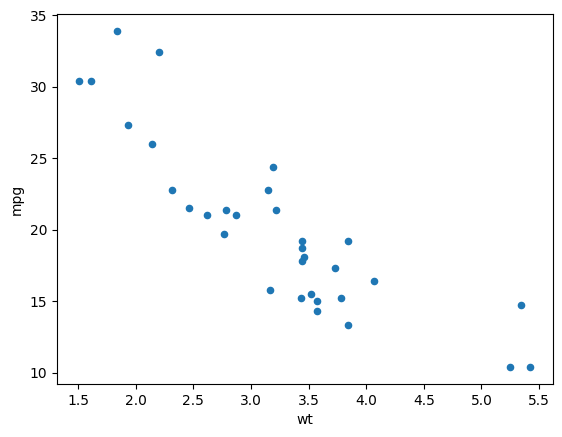

In [4]:
df.plot.scatter(x='wt', y='mpg')

In [28]:
# Tratamento de dados - normalização/ajuste de escala
scaler = MinMaxScaler(feature_range=(0,1))
df['mpg01'], df['wt01'] = scaler.fit_transform(df[['mpg']]), scaler.fit_transform(df[['wt']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='wt', ylabel='mpg'>

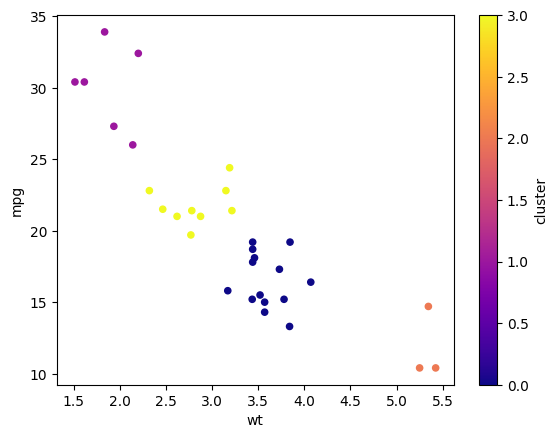

In [30]:
# Execução do K-Means - random_state => define uma semente para geração dos K centróides iniciais em posições aleatórias
k = KMeans(n_clusters=4, random_state=1).fit(df[['mpg01', 'wt01']])

df['cluster'] = k.labels_
df.plot.scatter(x='wt', y='mpg', c='cluster', colormap='plasma')

# MAIS ALGORITMOS DE APRENDIZAGEM SUPERVISIONADA
RandomForest

In [81]:
# 0. Carga de bibliotecas
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split   # geração de amostras aleatórias para treino e teste
from sklearn.metrics import accuracy_score             # métrica de erro de classificadores chamada acurácia
from sklearn.metrics import precision_score             # métrica de erro de classificadores chamada precision
from sklearn.metrics import recall_score             # métrica de erro de classificadores chamada recall

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

dfTit = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv")

# Criação da variável Dummy para Gênero
dummies_sex = pd.get_dummies(dfTit['Sex'])
dfTit['SexFemale'] = dummies_sex['female']
# Criação da variável Dummy para Classe
dummies_pclass = pd.get_dummies(dfTit['Pclass'], prefix='c')
dfTit['Pclass1'] = dummies_pclass['c_1']
dfTit['Pclass2'] = dummies_pclass['c_2']
# Tratamento de dados - preenchimento de idades nulas
ageMed = dfTit['Age'].mean()
dfTit['Age'] = dfTit['Age'].fillna(ageMed)

# Separação de nova base de treino e teste, a partir do train.csv
x_treino, x_teste, y_treino, y_teste = train_test_split(dfTit[['SexFemale','Pclass1','Pclass2','Age']] , dfTit['Survived'], test_size=0.25, random_state=1)

# Modelo de Árvores de Decisão
# modTit = tree.DecisionTreeClassifier()

# Algoritmo RandomForest
# modTit = RandomForestClassifier(n_estimators=10000, random_state=1)

# Algoritmo SVM (SVC = super vector machines classifier)
modTit = svm.SVC()

modTit.fit(x_treino, y_treino)


# Previsão em teste
y_prev = modTit.predict(x_teste)

# Acurácia
print(accuracy_score(y_teste, y_prev))
# Precision
print(precision_score(y_teste, y_prev))
# Recall
print(recall_score(y_teste, y_prev))
# Matriz de confusão
pd.crosstab(y_prev, y_teste, margins=True)

0.5650224215246636
0.42857142857142855
0.06315789473684211


Survived,0,1,All
row_0,,,
0,120,89,209
1,8,6,14
All,128,95,223


In [49]:
print(accuracy_score(y_teste, y_prev))


0.7533632286995515


# AutoML - low code
Utilizando pyCaret

In [83]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.0 MB/s eta 0:0

In [85]:
# Importar bibliotecas
from pycaret.classification import *

In [86]:
# Setup do conjunto de dados para um classificador
s = setup(dfTit, target='Survived')

,Description,Value
0,Session id,3316
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 15)"
4,Transformed data shape,"(891, 17)"
5,Transformed train set shape,"(623, 17)"
6,Transformed test set shape,"(268, 17)"
7,Ordinal features,1
8,Numeric features,9
9,Categorical features,5


In [99]:
# Execução e comparação de modelos
best = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8008,0.8518,0.6652,0.8041,0.7199,0.5679,0.5806,0.4290
ridge,Ridge Classifier,0.7464,0.0000,0.4350,0.8185,0.5667,0.4111,0.4526,0.1480
et,Extra Trees Classifier,0.7336,0.7624,0.4062,0.8130,0.5381,0.3791,0.4264,0.3100
nb,Naive Bayes,0.6565,0.7860,0.1549,0.7332,0.2515,0.1447,0.2154,0.2760
svm,SVM - Linear Kernel,0.6322,0.0000,0.3047,0.5421,0.3198,0.1496,0.1646,0.1580
rf,Random Forest Classifier,0.6244,0.8220,0.0208,0.3000,0.0388,0.0252,0.0622,0.3510
lda,Linear Discriminant Analysis,0.6212,0.5287,0.0217,0.0714,0.0333,0.0194,0.0254,0.1630
dt,Decision Tree Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1560
qda,Quadratic Discriminant Analysis,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3240
ada,Ada Boost Classifier,0.6164,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2620


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [96]:
# Detalhamento do melhor modelo
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3316, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [103]:
# Análise do melhor modelo
evaluate_model(best[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…